In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic/gender_submission.csv")
df_train = pd.read_csv("titanic/train.csv")
df_test = pd.read_csv("titanic/test.csv")
df.head(), df_train.head(), df_test.head()

(   PassengerId  Survived
 0          892         0
 1          893         1
 2          894         0
 3          895         0
 4          896         1,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C8

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.duplicated().sum()

0

In [8]:
df_train.duplicated().sum()

0

In [5]:
df.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
## Handle missing values of Age and Cabin columns
df_train["Age"].fillna(df_train["Age"].median(), inplace=True)
df_train["Cabin"].fillna("Unknown", inplace=True)
df_train.isnull().sum()

/var/folders/g7/wwql1txs12vfb0164n1dlzt80000gn/T/ipykernel_6208/3589850120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Age"].fillna(df_train["Age"].median(), inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

## EDA

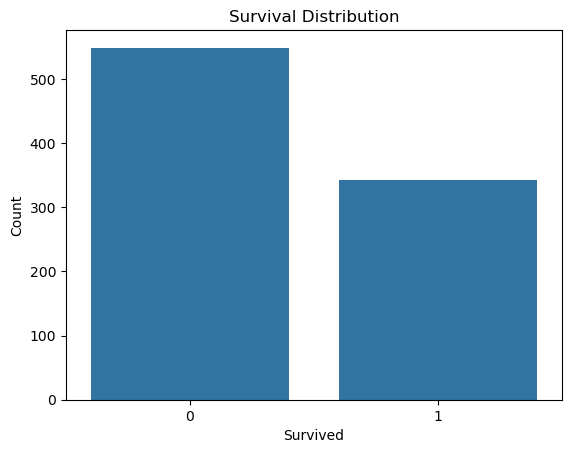

In [12]:
## Survival Distribution
sns.countplot(x="Survived", data=df_train)
plt.title("Survival Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

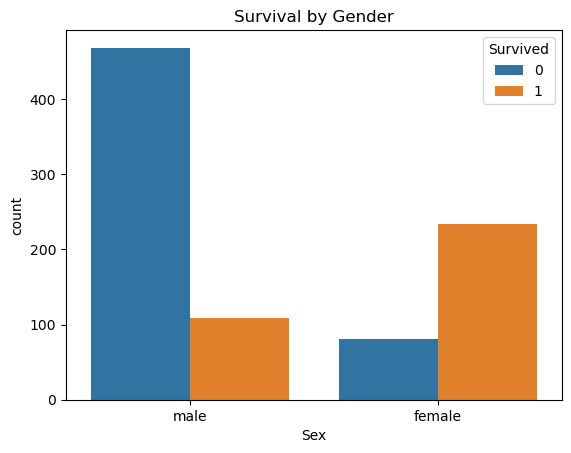

In [13]:
## Survival Distribution by gender
sns.countplot(x='Sex', hue='Survived', data=df_train)
plt.title("Survival by Gender")
plt.show()

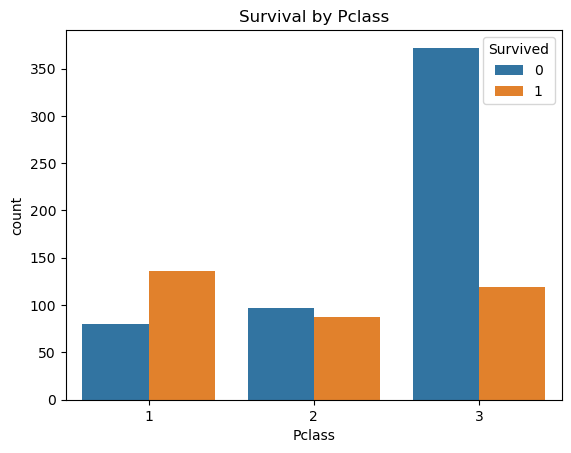

In [14]:
## Survival distribution by Pclass 
sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title("Survival by Pclass")
plt.show()


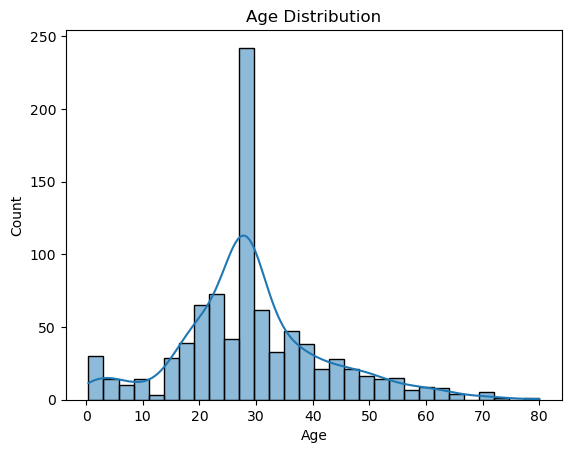

In [15]:
## Discribution of Age

sns.histplot(df_train['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


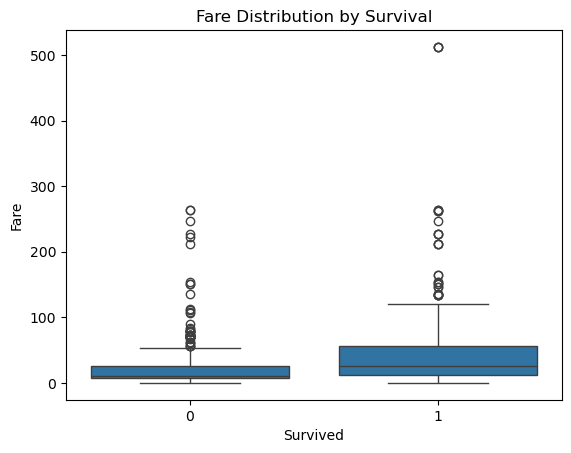

In [17]:
## Fare distribution by survival
sns.boxplot(x='Survived', y='Fare', data=df_train)
plt.title("Fare Distribution by Survival")
plt.show()

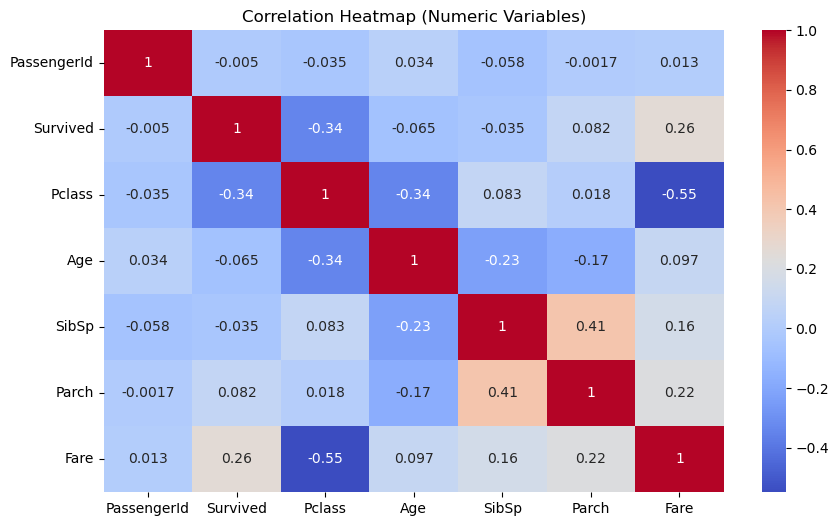

In [ ]:
## Correlation heatmap of numerica variables
# Select only numeric columns
numeric_df = df_train.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()


In [ ]:
## test chi-square categorical variables

import scipy.stats as stats

contingency_table = pd.crosstab(df_train['Sex'], df_train['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("P-value:", p)


Chi-square value: 260.71702016732104
P-value: 1.1973570627755645e-58


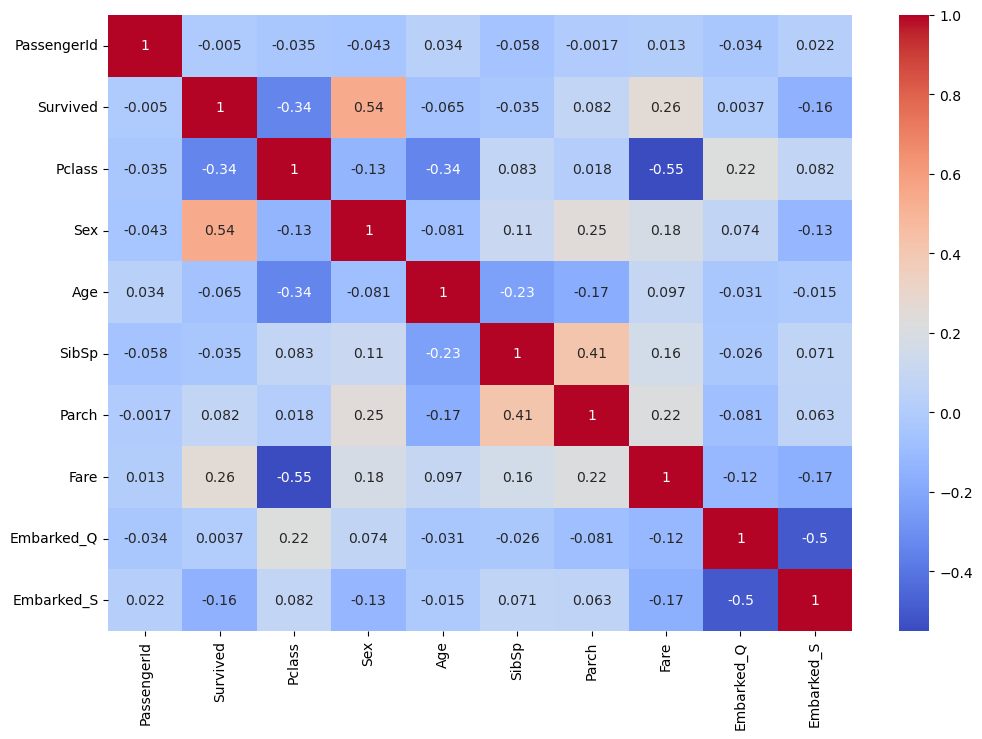

In [24]:
##Convert categorical variables to numeric

df_encoded = df_train.copy()

# Encode categorical columns
df_encoded['Sex'] = df_encoded['Sex'].map({'male':0, 'female':1})
df_encoded = pd.get_dummies(df_encoded, columns=['Embarked'], drop_first=True)

# Remove text columns
df_encoded = df_encoded.drop(['Name','Ticket','Cabin'], axis=1)

plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()
